# 셀프 어텐션 동작 원리

## 1. 모델 입력과 출력
- 다음 그림 트랜스포머 모델의 전체 구조에서 빨간 상자는 모델 입력을 만드는 계층 입력 계층(input layer)이라 한다.
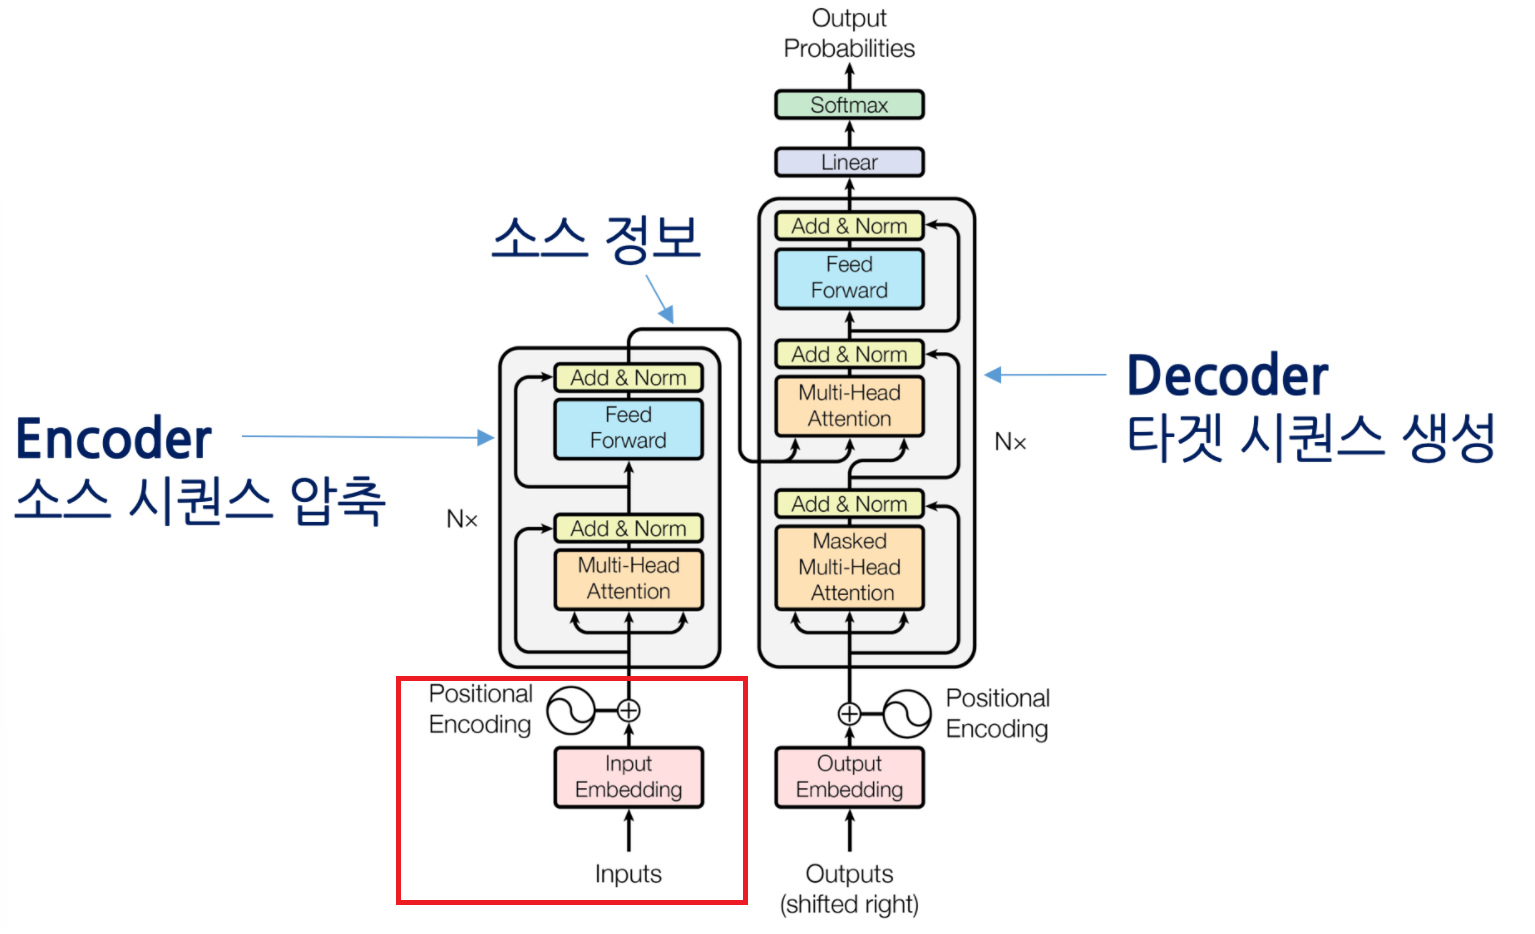

- 그림에서 확인할 수 있듯이 인코더 입력은 소스 시퀀스의 입력 임베딩(input embedding)에 위치 정보(positional encoding)을 더해서 만든다.
-  한국어에서 영어로 기계 번역을 수행하는 트랜스포머 모델을 구축하다고 가정 인코더 입력은 소스 언어 문장의 토큰 인덱스(index) 시퀀스가 된다.
> 예) 소스 언어의 토큰 시퀀스가 어제, 카페, 갔었어라면 인코더 입력층의 직접적인 입력값은 이들 토큰들에 대응하는 인덱스 시퀀스가 되며 인코더 입력은 아래 그림과 같은 방식으로 만들어 진다.
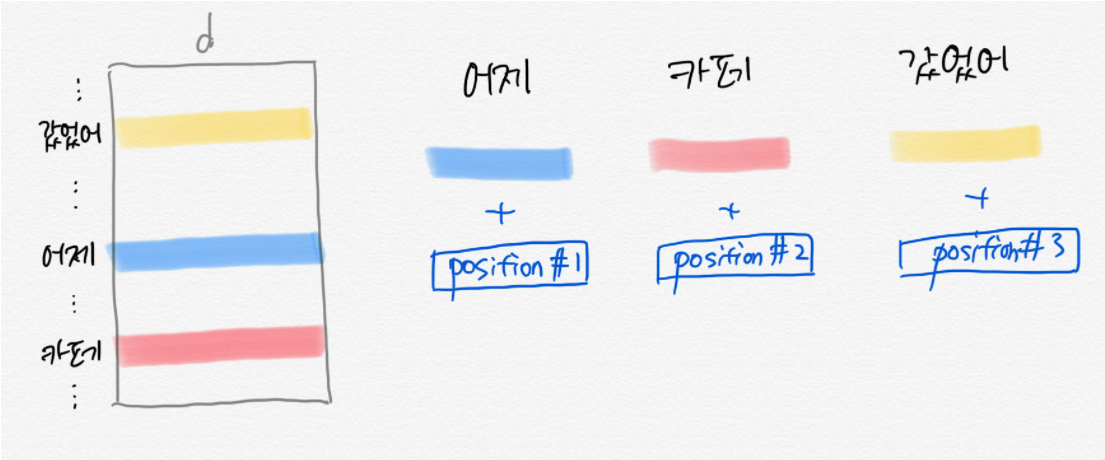

- 왼편 행렬(matrix)은 소스 언어의 각 어휘에 대응하는 단어 수준 임베딩 단어 수준 임베딩 행렬에서 현재 입력의 각 토큰 인덱스에 대응하는 벡터를 참조(lookup)해 가져온 것이 인코더로 전달될 input embedding이다.
- 단어 수준 임베딩은 트랜스포머의 다른 요소들처럼 소스 언어를 타겟 언어로 번역하는 태스크를 수행하는 과정에서 같이 학습
  
- 입력 임베딩에 더하는 위치 정보는 해당 토큰이 문장 내에서 몇 번째 위치인지 정보(위 그림에서 어제가 첫번째, 카페가 두번째, 갔었어가 세번째)
- 트랜스포머 모델은 이같은 방식으로 소스 언어의 토큰 시퀀스를 이에 대응하는 벡터 시퀀스로 변환해 인코더 입력을 만든다. 디코더 입력 역시 만드는 방식이 거의 같다.

- 아래 그림은 인코더와 디코더 블록만 나타낸 그림이다. 인코더 입력층에서 만들어진 벡터 시퀀스가 최초 인코더 블록의 입력이 되며, 그 출력 벡터 시퀀스가 두 번째 인코더 블록의 입력이 된다.
- 다음 인코더 블록의 입력은 이전 블록의 출력입니다. 이를  N번 반복
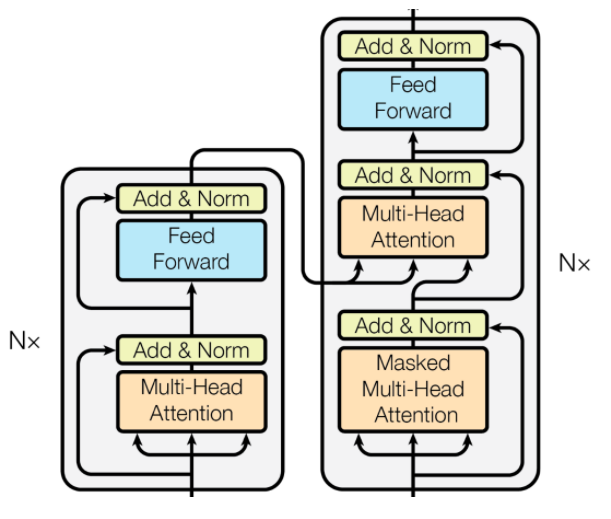

-  
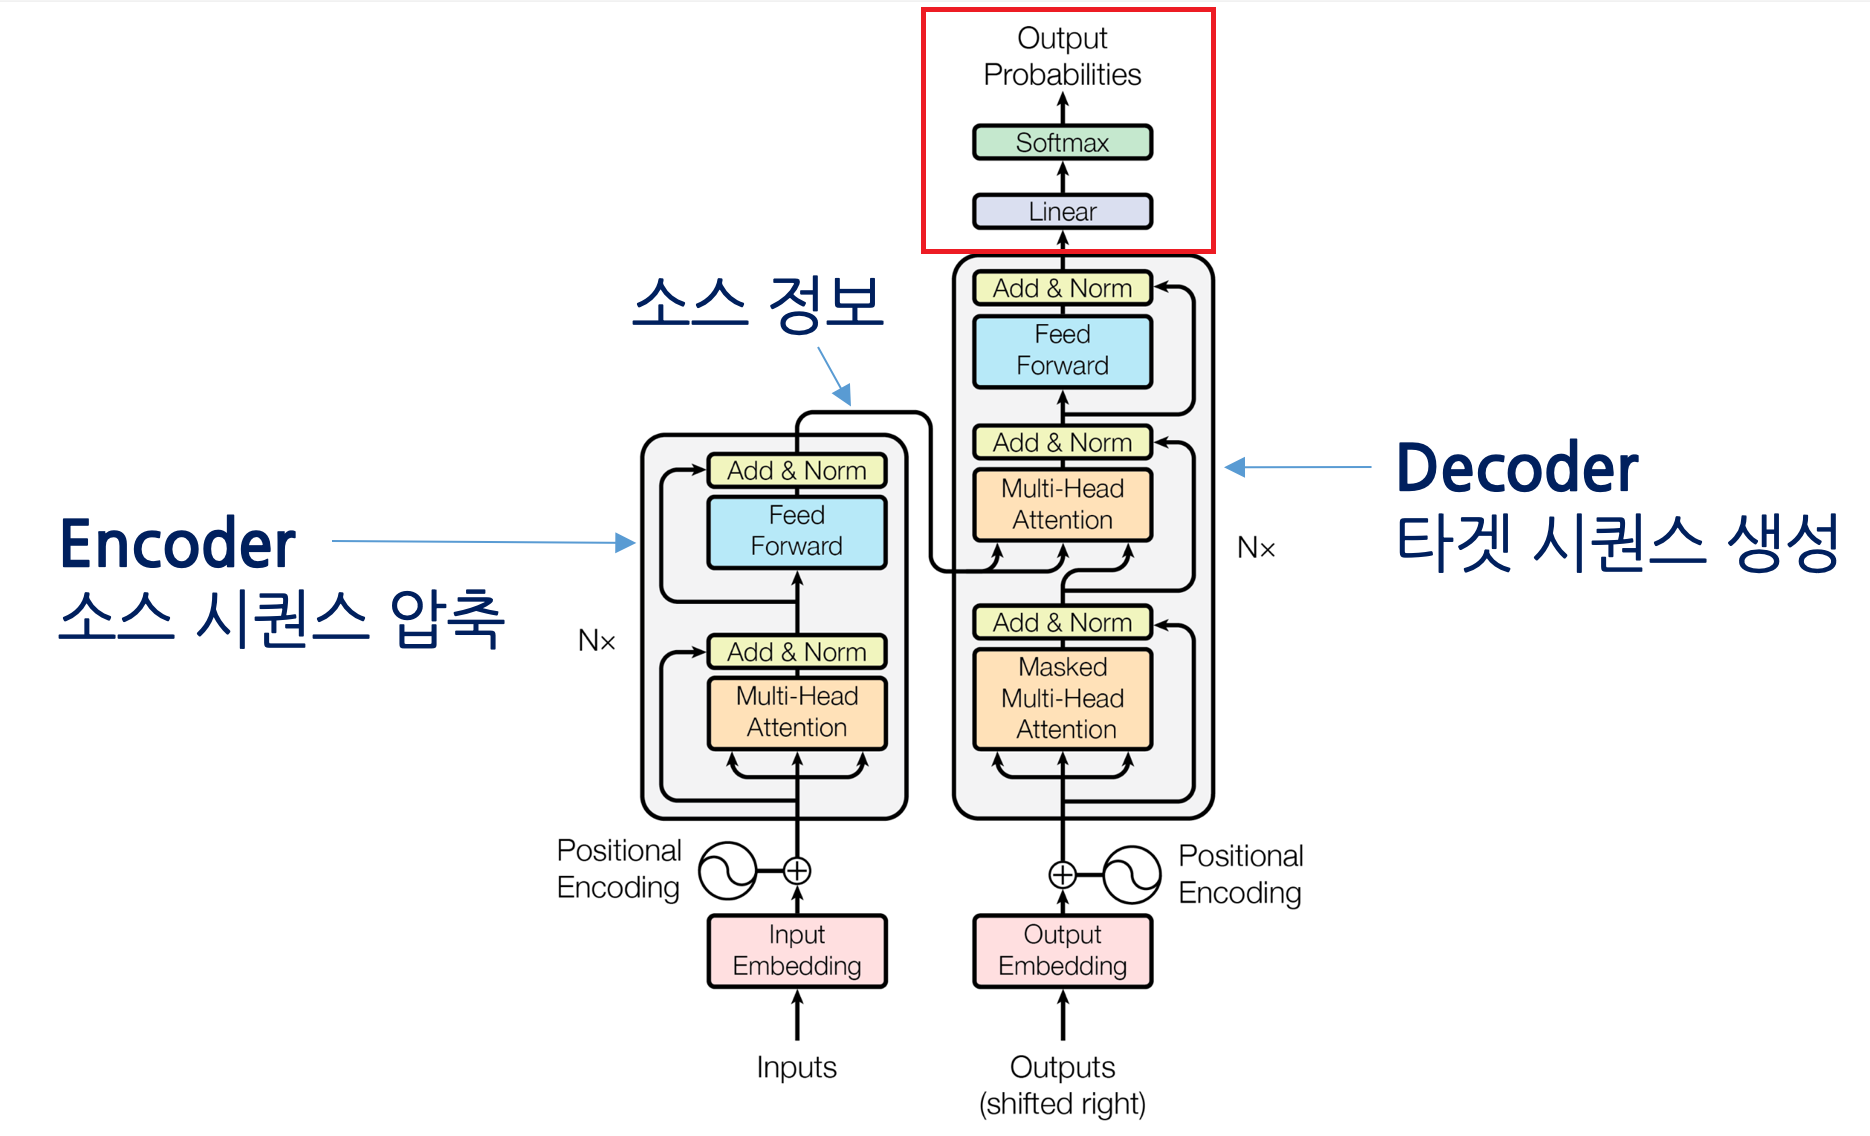
- 출력층(output layer)을 보면
- 이 출력층의 입력은 디코더 마지막 블록의 출력 벡터 시퀀스. 
- 출력층의 출력은 타깃 언어의 어휘 수만큼의 차원을 갖는 확률 벡터

## 셀프 어텐션 내부 동작
- 셀프 어텐션은 트랜스포머의 인코더와 디코더 블록 모두에서 수행
- 인코더의 셀프 어텐션을 기준으로 설명





### (1) 쿼리, 키, 밸류 만들기
- 인코더와 디코더 블록만 나타낸 그림에서 봤듯이 인코더에서 수행되는 셀프 어텐션의 입력은 이전 인코더 블록의 출력 벡터 시퀀스이다. 
- 입력 소스 언어의 토큰 시퀀스가 어제, 카페, 갔었어 3개 이고 임베딩 차원수(d)가 4이면, 셀프 어텐션 입력은 수식1의  X 과 같은 형태가 된다.   
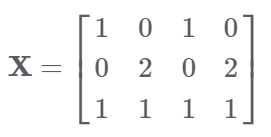

- 셀프 어텐션은 쿼리(query), 키(key), 밸류(value) 3개 요소 사이의 문맥적 관계성을 추출하는 과정
- 입력 벡터 시퀀스(X)에 쿼리, 키, 밸류를 만들어주는 행렬(W)을 각각 곱한다.
- 입력 벡터 시퀀스가 3개라면 다음 수식을 적용하면 쿼리, 키, 밸류는 각각 3개씩 총 9개의 벡터가 생성.
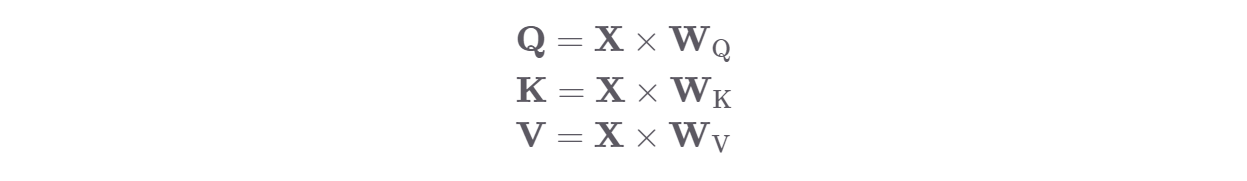

- 쿼리, 키, 밸류 계산 예
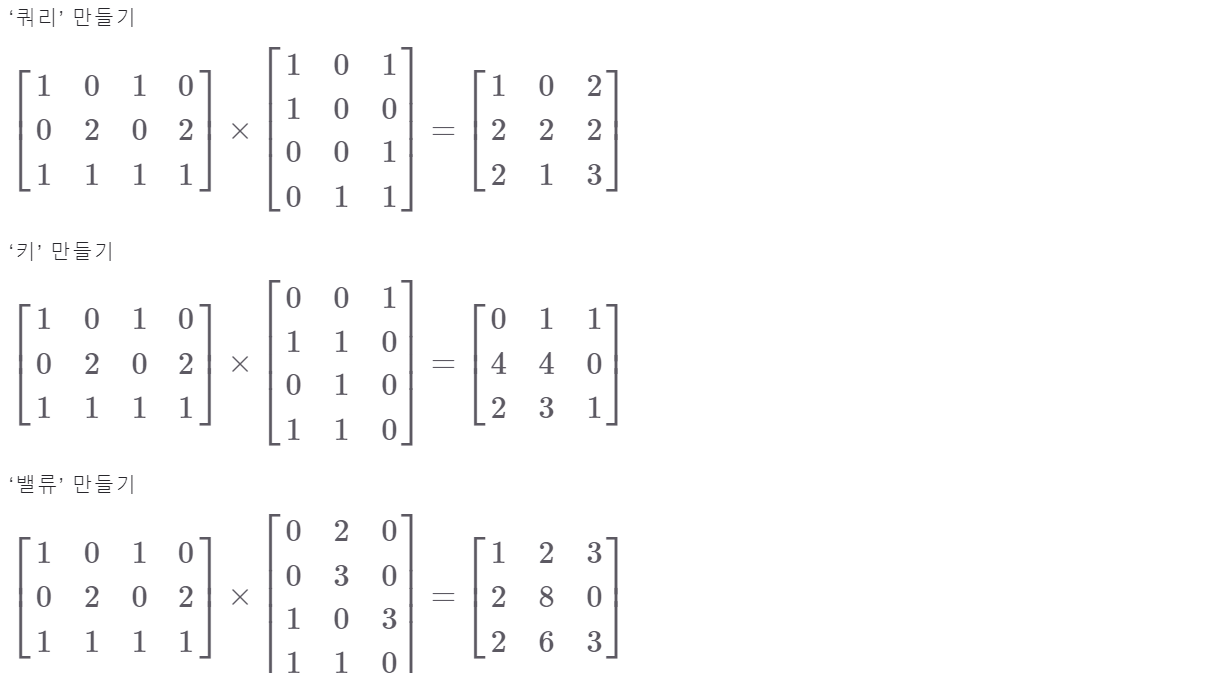

- 다음 세 가지 행렬은 태스크(예: 기계 번역)를 가장 잘 수행하는 방향으로 학습 과정에서 업데이트.

### (2) 첫 번째 쿼리의 셀프 어텐션 출력값 계산하기

- 셀프 에텐션 정의
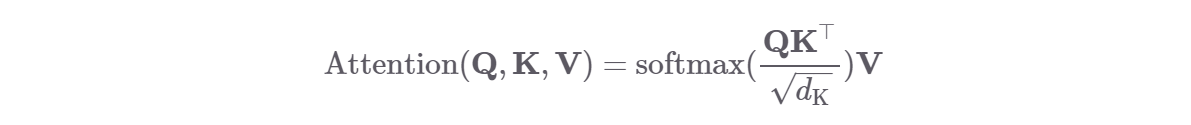

- 쿼리와 키를 행렬곱한 뒤 해당 행렬의 모든 요소값을 키 차원수의 제곱근 값으로 나눠주고, 이 행렬을 행(row) 단위로 소프트맥스(softmax)를 취해 스코어 행렬을 만든다.

#### 파이토치를 활용해 코드를 활용한 셀프 어텐션 연산

- 입력 벡터 시퀀스  X 와 쿼리, 키, 밸류 구축에 필요한 행렬들을 앞선 예시 그대로 정의

In [1]:
import torch
x = torch.tensor([
  [1.0, 0.0, 1.0, 0.0],
  [0.0, 2.0, 0.0, 2.0],
  [1.0, 1.0, 1.0, 1.0],  
])
w_query = torch.tensor([
  [1.0, 0.0, 1.0],
  [1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 1.0, 1.0]
])
w_key = torch.tensor([
  [0.0, 0.0, 1.0],
  [1.0, 1.0, 0.0],
  [0.0, 1.0, 0.0],
  [1.0, 1.0, 0.0]
])
w_value = torch.tensor([
  [0.0, 2.0, 0.0],
  [0.0, 3.0, 0.0],
  [1.0, 0.0, 3.0],
  [1.0, 1.0, 0.0]
])

- 입력 벡터 시퀀스로 쿼리, 키, 밸류 벡터 연산
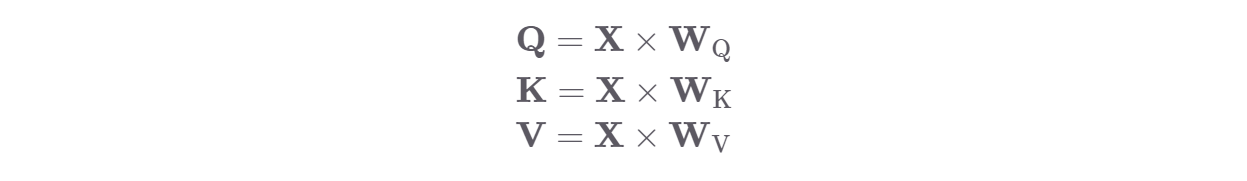

In [2]:
keys = torch.matmul(x, w_key)
querys = torch.matmul(x, w_query)
values = torch.matmul(x, w_value)

In [3]:
print('keys: \n', keys)
print('querys: \n', querys)
print('values: \n', values)

keys: 
 tensor([[0., 1., 1.],
        [4., 4., 0.],
        [2., 3., 1.]])
querys: 
 tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]])
values: 
 tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])


-  어텐션 스코어 만들기

In [4]:
attn_scores = torch.matmul(querys, keys.T)
attn_scores

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]])

- 소프트맥스 확률값 만들기

In [ ]:
import numpy as np
from torch.nn.functional import softmax
key_dim_sqrt = np.sqrt(keys.shape[-1]) # keys.shape[-1] = dim
attn_scores_softmax = softmax(attn_scores / key_dim_sqrt, dim=-1)
print(attn_scores_softmax)

tensor([[1.3613e-01, 4.3194e-01, 4.3194e-01],
        [8.9045e-04, 9.0884e-01, 9.0267e-02],
        [7.4449e-03, 7.5471e-01, 2.3785e-01]])


## 멀티 헤드 어텐션(Multi-Head Attention)
- 멀티-헤드 어텐션(Multi-Head Attention)은 셀프 어텐션(self attention)을 여러 번 수행한 결과
- 여러 헤드가 독자적으로 셀프 어텐션을 계산
- 같은 문서(입력)를 두고 독자(헤드) 여러 명이 함께 읽는 구조

> - 아래 그림은 입력 단어 수는 2개, 밸류의 차원수는 3, 헤드는 8개인 멀티-헤드 어텐션을 나타낸 그림
- 개별 헤드의 셀프 어텐션 수행 결과는 ‘입력 단어 수  ×  밸류 차원수’
- 8개 헤드의 셀프 어텐션 수행 결과를 다음 그림의 ①처럼 이어 붙이면  2×24 의 행렬이 된다.
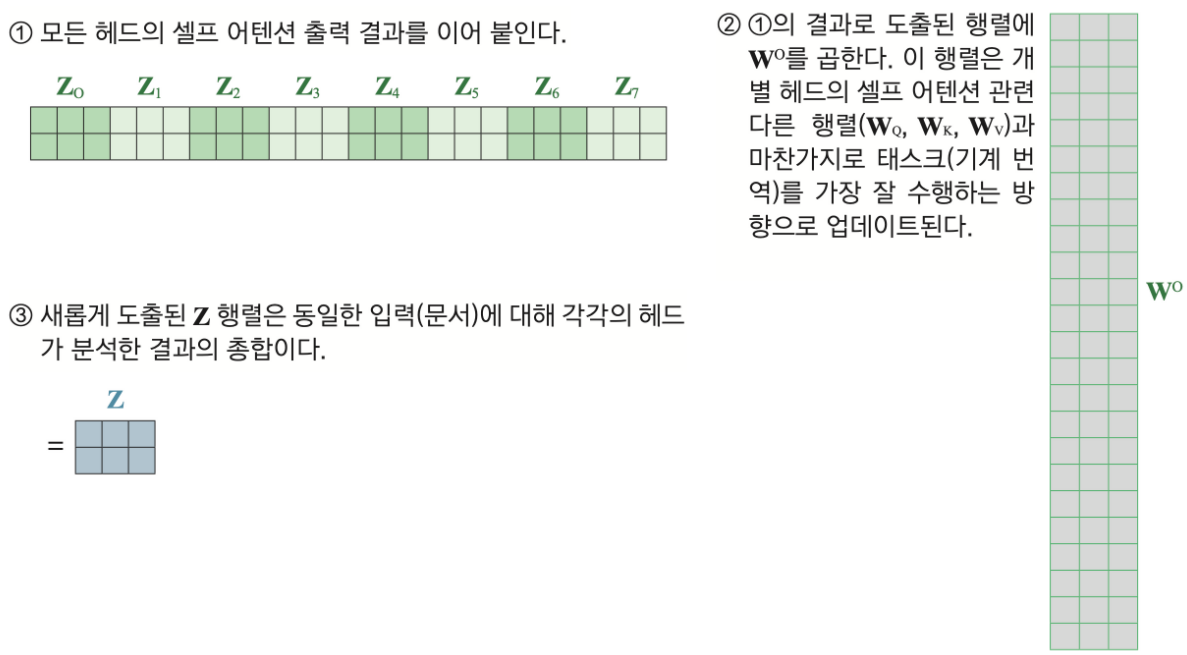

- 멀티-헤드 어텐션은 개별 헤드의 셀프 어텐션 수행 결과를 이어붙인 행렬(①)에 W<sup>O</sup>를 행렬곱해서 마무리
- W<sup>O</sup> 의 크기는 ‘셀프 어텐션 수행 결과 행렬의 열(column)의 수 × 목표 차원수’

## 인코더에서 수행하는 셀프 어텐션
- 인코더 블록의 입력은 이전 블록의 단어 벡터 시퀀스, 출력은 이번 블록 수행 결과로 도출된 단어 벡터 시퀀스
- 인코더에서 수행되는 셀프 어텐션은 쿼리, 키, 밸류가 모두 소스 시퀀스와 관련된 정보
- 트랜스포머의 학습 과제가 한국어에서 영어로 번역하는 태스크라면, 인코더의 쿼리, 키, 밸류는 모두 한국어이다.
- 오른쪽 그림은 쿼리가 '어제'인 경우의 셀프 어텐션을 나타낸다. 잘 학습된 트랜스포머라면 쿼리, 키로부터 계산한 소프트맥스 확률 가운데 과거 시제에 해당하는 '갔었어', '많더라' 등의 단어가 높은 값을 지닌다.
- 왼쪽 그림은 쿼리가 '카페'인 경우의 셀프 어텐션을 나타낸다. 잘 학습된 트랜스포머라면 쿼리, 키로부터 계산한 소프트맥스 확률 가운데 장소를 지칭하는 대명사 '거기'가 높은 값을 지닌다.
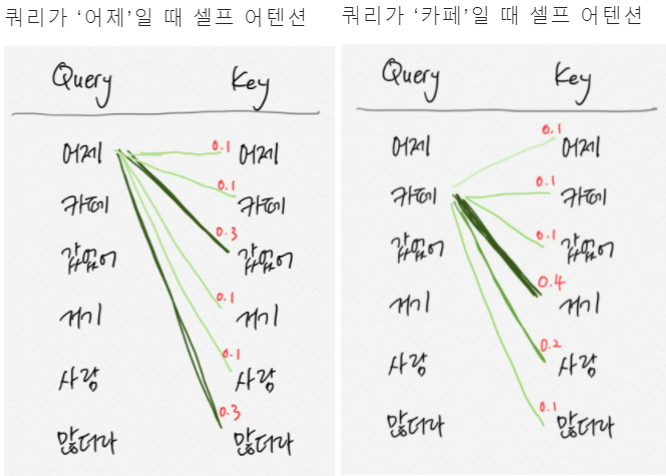
- 이같은 계산을 모든 쿼리에서 수행

## 디코더에서 수행하는 셀프 어텐션
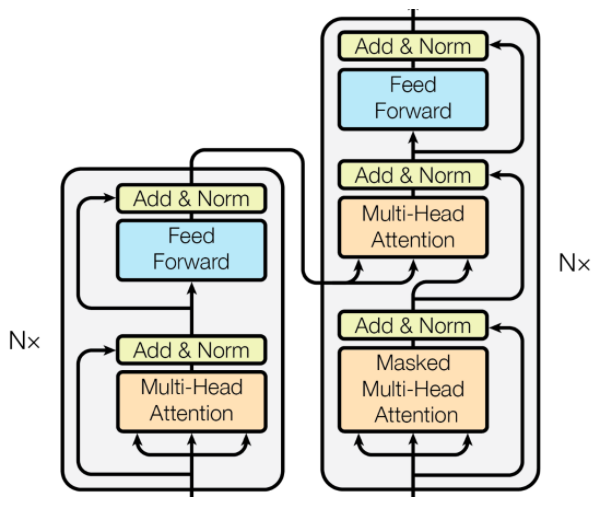

- 위 그림에서 확인 할 수 있듯이 디코더 입력은 ① 인코더 마지막 블록에서 나온 소스 단어 벡터 시퀀스 ② 이전 디코더 블록의 수행 결과로 도출된 타깃 단어 벡터 시퀀스

### 마스크 멀티 헤드 어텐션(Masked Multi-Head Attention)
- 타깃 언어의 단어 벡터 시퀀스를 계산 대상으로 한다. 한국어를 영어로 번역하는 태스크를 수행하는 트랜스포머 모델이라면 여기서 계산되는 대상은 영어 단어 시퀀스.
- 입력 시퀀스가 타깃 언어(영어)로 바뀌었을 뿐 인코더 쪽 셀프 어텐션과 크게 다를 바가 없음.
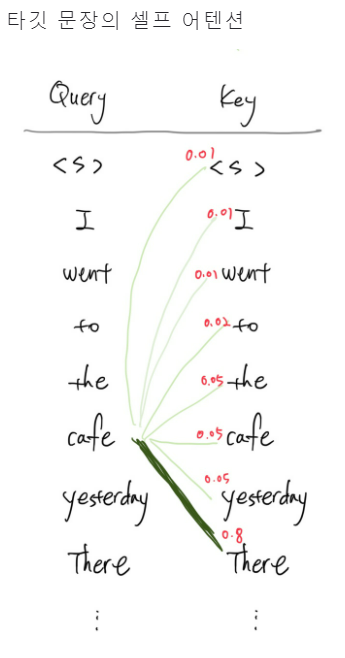

### 멀티 헤드 어텐션(Multi-Head Attention)
- 인코더와 디코더 쪽 정보를 모두 활용
- 인코더에서 넘어온 정보는 소스 언어의 문장('어제 카페 갔었어 거기 사람 많더라')의 단어 벡터 시퀀스
- 디코더 정보는 타깃 언어 문장('\<s> I went to the cafe yesterday There ...')의 단어 벡터 시퀀스
- 전자를 키, 후자를 쿼리로 삼아 셀프 어텐션 계산을 수행    
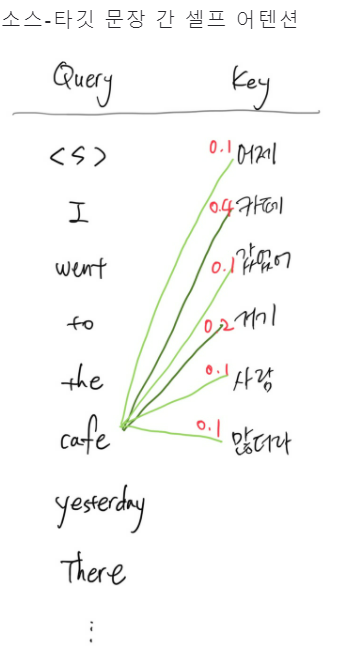

- 하지만 실제 번역 모델에서는 약간의 트릭을 사용.    
트랜스포머 모델의 최종 출력은 타겟 시퀀스 각각에 대한 확률 분포이다. 모델이 한국어를 영어로 번역하는 태스크를 수행하고 있다면 영어 문장의 다음 단어가 어떤 것이 적절할지에 관한 확률을 나타낸다.   
> 예)    
 - 인코더에 어제 카페 갔었어 거기 사람 많더라가, 디코더에 \<s>가 입력된 상황이라면 트랜스포머 모델은 다음 영어 단어 I를 맞추도록 학습
 - 하지만 학습 과정에서 모델에 이번에 맞춰야할 정답인 I를 알려주게 되면 학습하는 의미가 사라진다.
 - 따라서 정답을 포함한 미래 정보를 셀프 어텐션 계산에서 제외

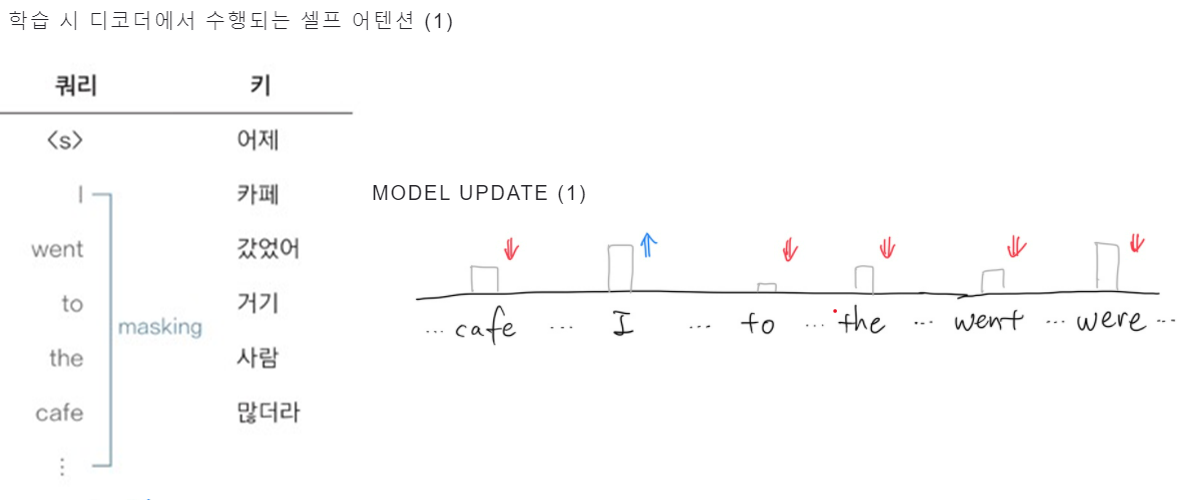

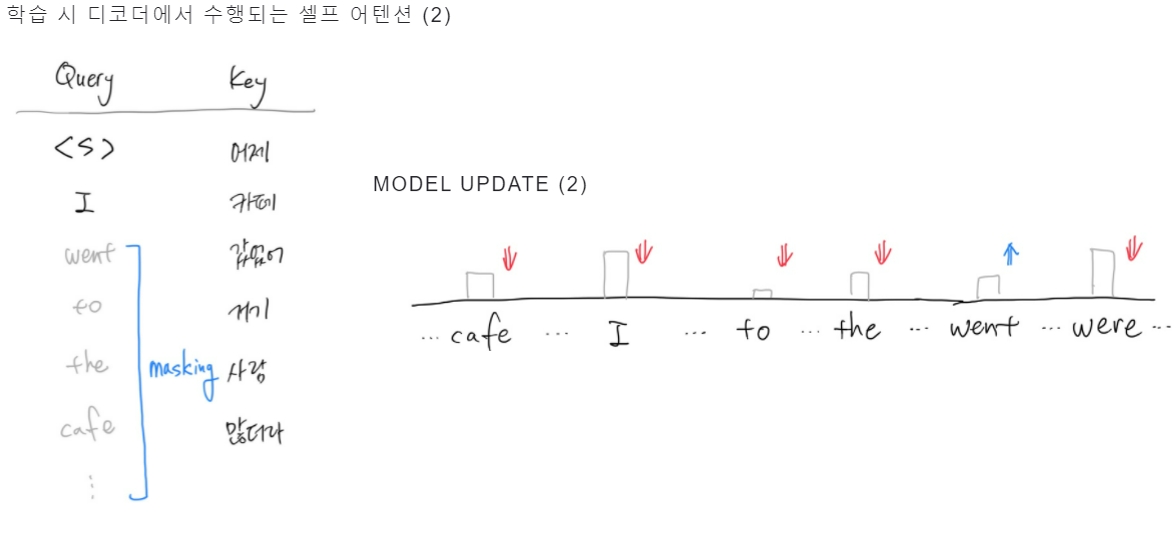

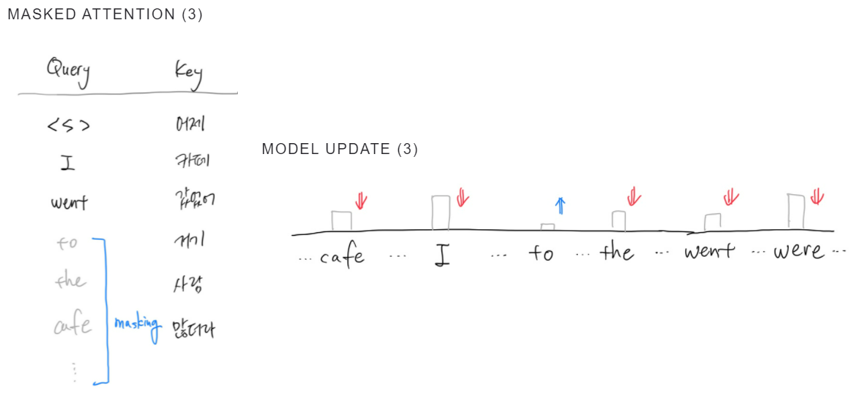

- 트랜스포머 모델은 이런 방식으로 말뭉치 전체를 훑어가면서 반복 학습
1. 소스 언어(한국어) 문장을 인코더에 입력해 인코더 마지막 블록의 단어 벡터 시퀀스를 추출
2. 인코더에서 넘어온 소스 언어 문장 정보와 디코더에 타깃 문장 시작을 알리는 스페셜 토큰 \<s>를 넣어서, 타깃 언어(영어)의 첫 번째 토큰을 생성
3. 인코더 쪽에서 넘어온 소스 언어 문장 정보와 이전에 생성된 타깃 언어 토큰 시퀀스를 디코더에 넣어서 만든 정보로 타깃 언어의 다음 토큰을 생성
4. 생성된 문장 길이가 충분하거나 문장 끝을 알리는 스페셜 토큰 \</s>가 나올 때까지 3을 반복